In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sohamdatta05","key":"8b61fd65debb54177f471b54e9f298a7"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d debarshichanda/goemotions

Dataset URL: https://www.kaggle.com/datasets/debarshichanda/goemotions
License(s): CC0-1.0
goemotions.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip -q goemotions.zip -d goemotions_data

replace goemotions_data/GoEmotionsFormat.PNG? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace goemotions_data/README.md? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace goemotions_data/analyze_data.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_csv("/content/goemotions_data/data/full_dataset/goemotions_1.csv")
df2 = pd.read_csv("/content/goemotions_data/data/full_dataset/goemotions_2.csv")
df3 = pd.read_csv("/content/goemotions_data/data/full_dataset/goemotions_3.csv")


In [ ]:
full_df = pd.concat([df1, df2, df3], axis=0).reset_index(drop=True)

In [ ]:
full_df.head(5)

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,1.548381e+09,1,False,0,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,1.548084e+09,37,True,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,1.546428e+09,37,False,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,1.547965e+09,18,False,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,1.546669e+09,2,False,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
#Removing unecessary columns
full_df = full_df.drop(labels=['id', 'author', 'subreddit', 'link_id', 'parent_id', 'created_utc', 'rater_id'], axis=1)


In [ ]:
full_df.head()

,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,False,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
#Rmmoving rows that have unclear labels
full_df = full_df[full_df['example_very_unclear'] != 1]

In [ ]:
full_df.head(5)

,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,"You do right, if you don't care then fuck 'em!",False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,False,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,Right? Considering it’s such an important docu...,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
full_df = full_df.drop(labels=['example_very_unclear'], axis=1)

In [ ]:
full_df.head(2)

,text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,"You do right, if you don't care then fuck 'em!",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
#Data Cleaning

In [ ]:
import re
import string

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def clean_text(text):
    text = str(text).lower()                          # Lowercase
    text = re.sub(r"\[.*?\]", "", text)               # Remove stuff in brackets
    text = re.sub(r"\n", " ", text)                   # Remove newlines
    text = re.sub(r"[%s]" % re.escape(string.punctuation), "", text)  # Remove punctuation
    text = re.sub(r"\w*\d\w*", "", text)              # Remove words with numbers
    text = re.sub(r"\s+", " ", text).strip()          # Trim extra whitespace

    text = " ".join([word for word in text.split() if word not in stop_words])

    return text


In [ ]:
full_df['text'] = full_df['text'].apply(clean_text)

In [ ]:
full_df.shape

(207814, 29)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
text_data = full_df['text']
label_data = full_df.drop(columns=['text'])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, Y_train, Y_temp = train_test_split(text_data, label_data, test_size=0.2, random_state=42)

# split temp into val and test (50/50 → 10% each)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)


In [ ]:
max_length = max(len(X_train), len(X_test))
print("Max length of text is", max_length)

Max length of text is 166251


In [ ]:
min_length = min(len(X_train), len(X_test))
print("Max length of text is", min_length)

Max length of text is 20782


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

In [ ]:
actual_vocab_size = len(tokenizer.word_index)
print(actual_vocab_size)

33261


In [ ]:
#Capping vocab size
vocab_size = 15000

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

In [ ]:
print(X_train)

4196      im sorry happened guess sending mixed signals ...
178621    youre right lets see fox news analyst lt col s...
32        dark funny really nice guy yet call dead girls...
126851    love post much really drives point home made l...
36524           depends first name coworkers middle friends
                                ...                        
121831                im missing funny part someone killing
105369                                           say missed
134056                                      looks years old
149232    picture prime example intolerant douchebags al...
123937                                      awesome believe
Name: text, Length: 166251, dtype: object


In [ ]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq   = tokenizer.texts_to_sequences(X_val)
X_test_seq  = tokenizer.texts_to_sequences(X_test)


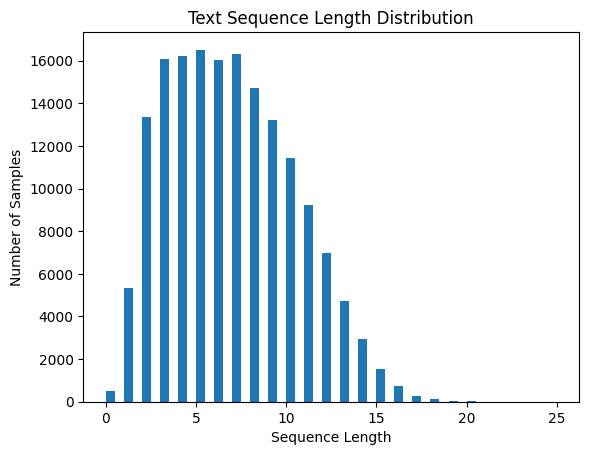

In [ ]:
import matplotlib.pyplot as plt


# Get their lengths
seq_lengths = [len(seq) for seq in X_train_seq]

# Plot
plt.hist(seq_lengths, bins=50)
plt.xlabel("Sequence Length")
plt.ylabel("Number of Samples")
plt.title("Text Sequence Length Distribution")
plt.show()


In [ ]:
import numpy as np

print("Median:", np.median(seq_lengths))
print("75th percentile:", np.percentile(seq_lengths, 75))
print("95th percentile:", np.percentile(seq_lengths, 95))
print("Max:", max(seq_lengths))


Median: 6.0
75th percentile: 9.0
95th percentile: 13.0
Max: 25


In [ ]:
max_length = 13

In [ ]:
#So we choose max words to be length that covers 95% of samples
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_val_pad   = pad_sequences(X_val_seq,   maxlen=max_length, padding='post', truncating='post')
X_test_pad  = pad_sequences(X_test_seq,  maxlen=max_length, padding='post', truncating='post')


In [ ]:
#Model Training

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dense, Dropout


In [ ]:
model = Sequential()

model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length))

model.add(Bidirectional(GRU(64)))
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(28, activation='sigmoid'))  # sigmoid for multi-label


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
history = model.fit(X_train_pad, Y_train,
                    validation_data=(X_val_pad, Y_val),
                    epochs=30,
                    batch_size=64)

Epoch 1/30
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 31s 9ms/step - accuracy: 0.2564 - loss: 0.1963 - val_accuracy: 0.3794 - val_loss: 0.1313
Epoch 2/30
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.3736 - loss: 0.1351 - val_accuracy: 0.3871 - val_loss: 0.1281
Epoch 3/30
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.3913 - loss: 0.1290 - val_accuracy: 0.3964 - val_loss: 0.1269
Epoch 4/30
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - accuracy: 0.4042 - loss: 0.1246 - val_accuracy: 0.3947 - val_loss: 0.1262
Epoch 5/30
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.4119 - loss: 0.1217 - val_accuracy: 0.3961 - val_loss: 0.1265
Epoch 6/30
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.4196 - loss: 0.1197 - val_accuracy: 0.3939 - val_loss: 0.1260
Epoch 7/30
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.4256 - loss: 0.1179 - val_accuracy: 0.3969 - val_loss: 0.1265
Epoch 8/30
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.4313 - loss: 0